In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/titanic_data.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
data.shape

(891, 12)

In [51]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
data.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [53]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
data['Age'] = data['Age'].fillna(np.mean(data['Age']))

In [55]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [56]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [57]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [58]:
# Replace infinite values (inf and -inf) with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

<Axes: ylabel='count'>

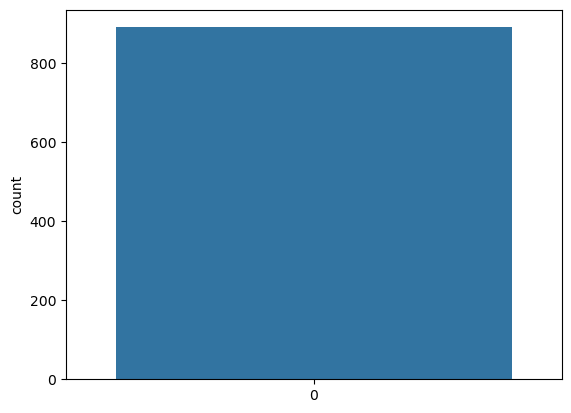

In [59]:
sns.countplot(data['Survived'])

<Axes: ylabel='count'>

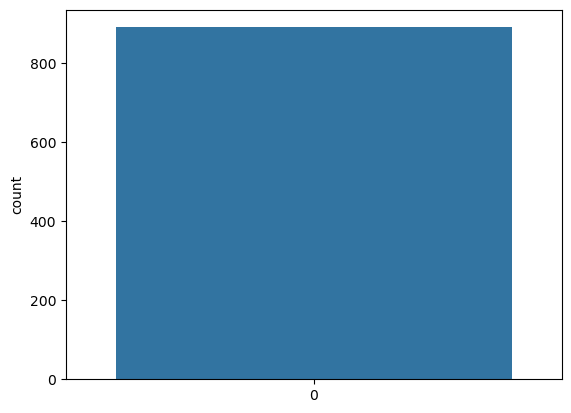

In [60]:
sns.countplot(data['Pclass'])

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


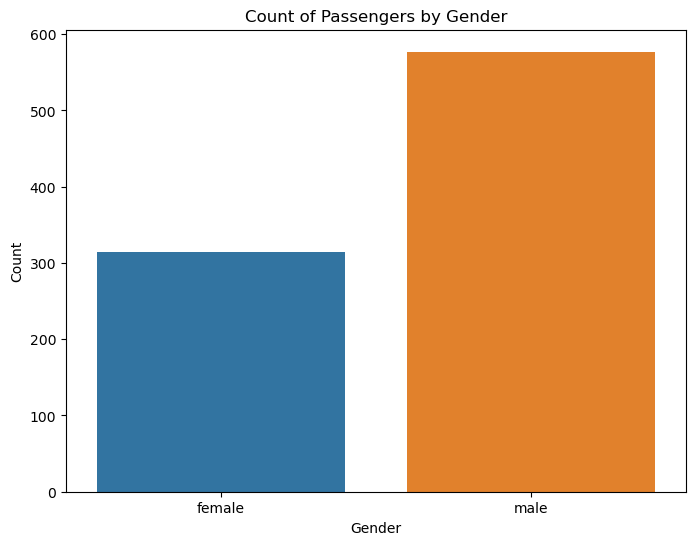

In [61]:
# Convert 'Sex' column to categorical data type
data['Sex'] = data['Sex'].astype('category')

# Plot count of each category in 'Sex'
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data)
plt.title('Count of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: >

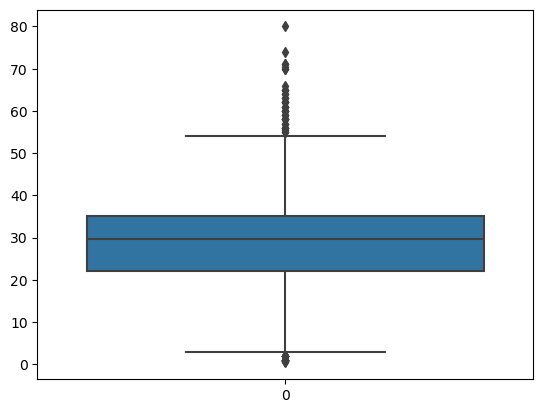

In [62]:
sns.boxplot(data['Age'])

<Axes: >

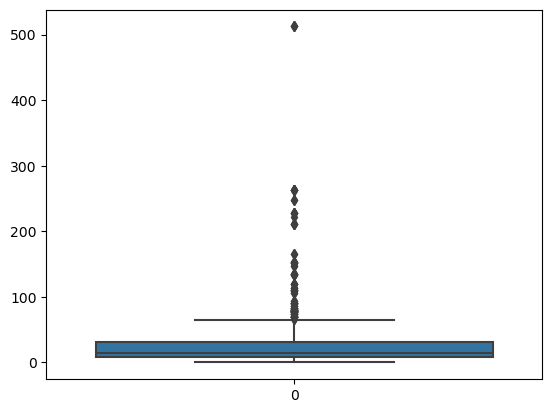

In [63]:
sns.boxplot(data['Fare'])

<Axes: >

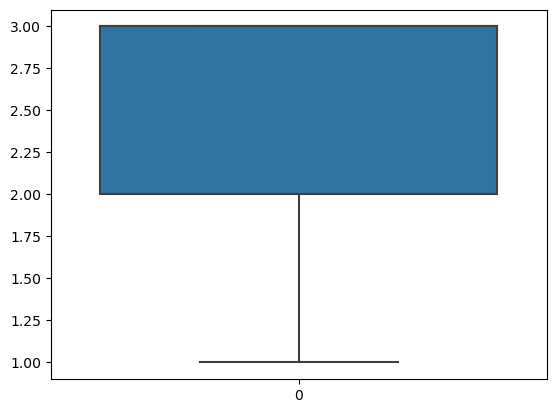

In [64]:
sns.boxplot(data['Pclass'])

<Axes: >

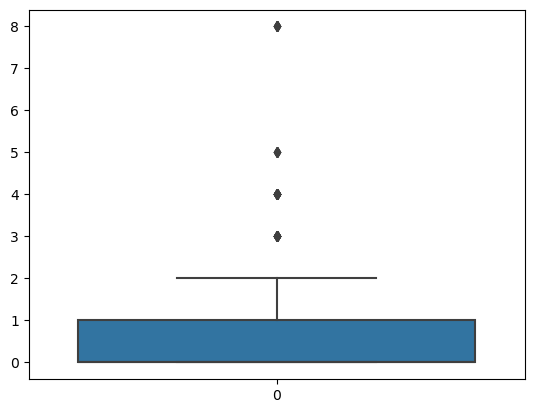

In [65]:
sns.boxplot(data['SibSp'])

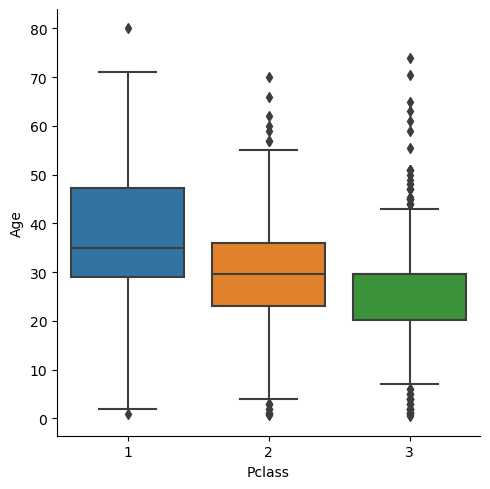

In [66]:
sns.catplot(x= 'Pclass', y = 'Age', data=data, kind = 'box')

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


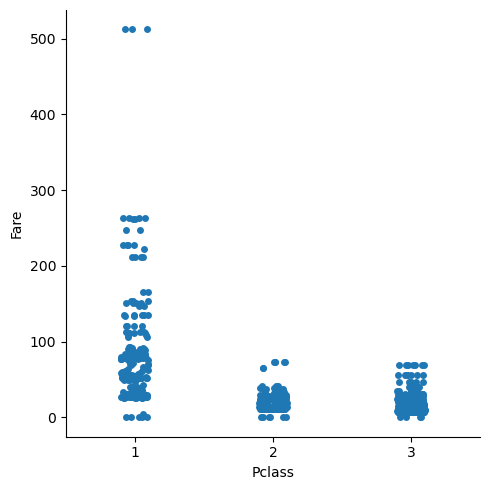

In [67]:
sns.catplot(x= 'Pclass', y = 'Fare', data=data, kind = 'strip')

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


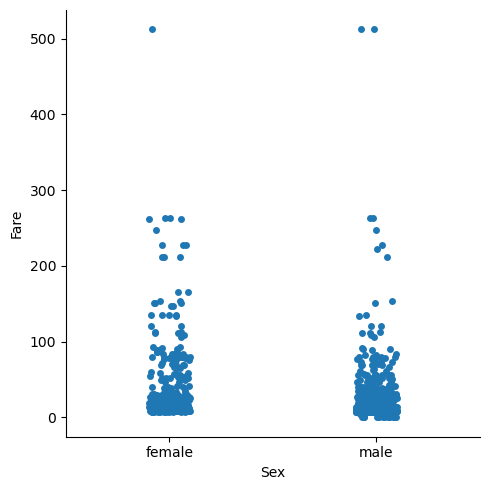

In [68]:
sns.catplot(x= 'Sex', y = 'Fare', data=data, kind = 'strip')

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


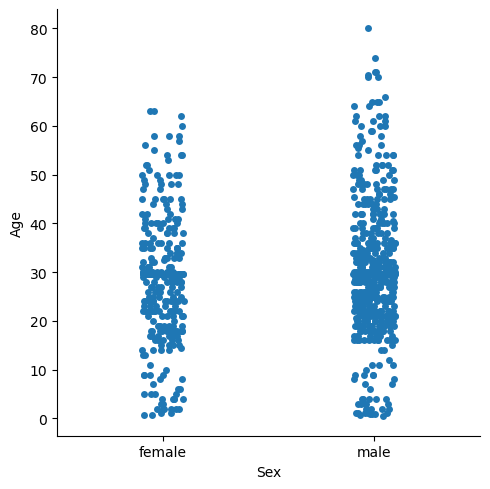

In [69]:
sns.catplot(x= 'Sex', y = 'Age', data=data, kind = 'strip')

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

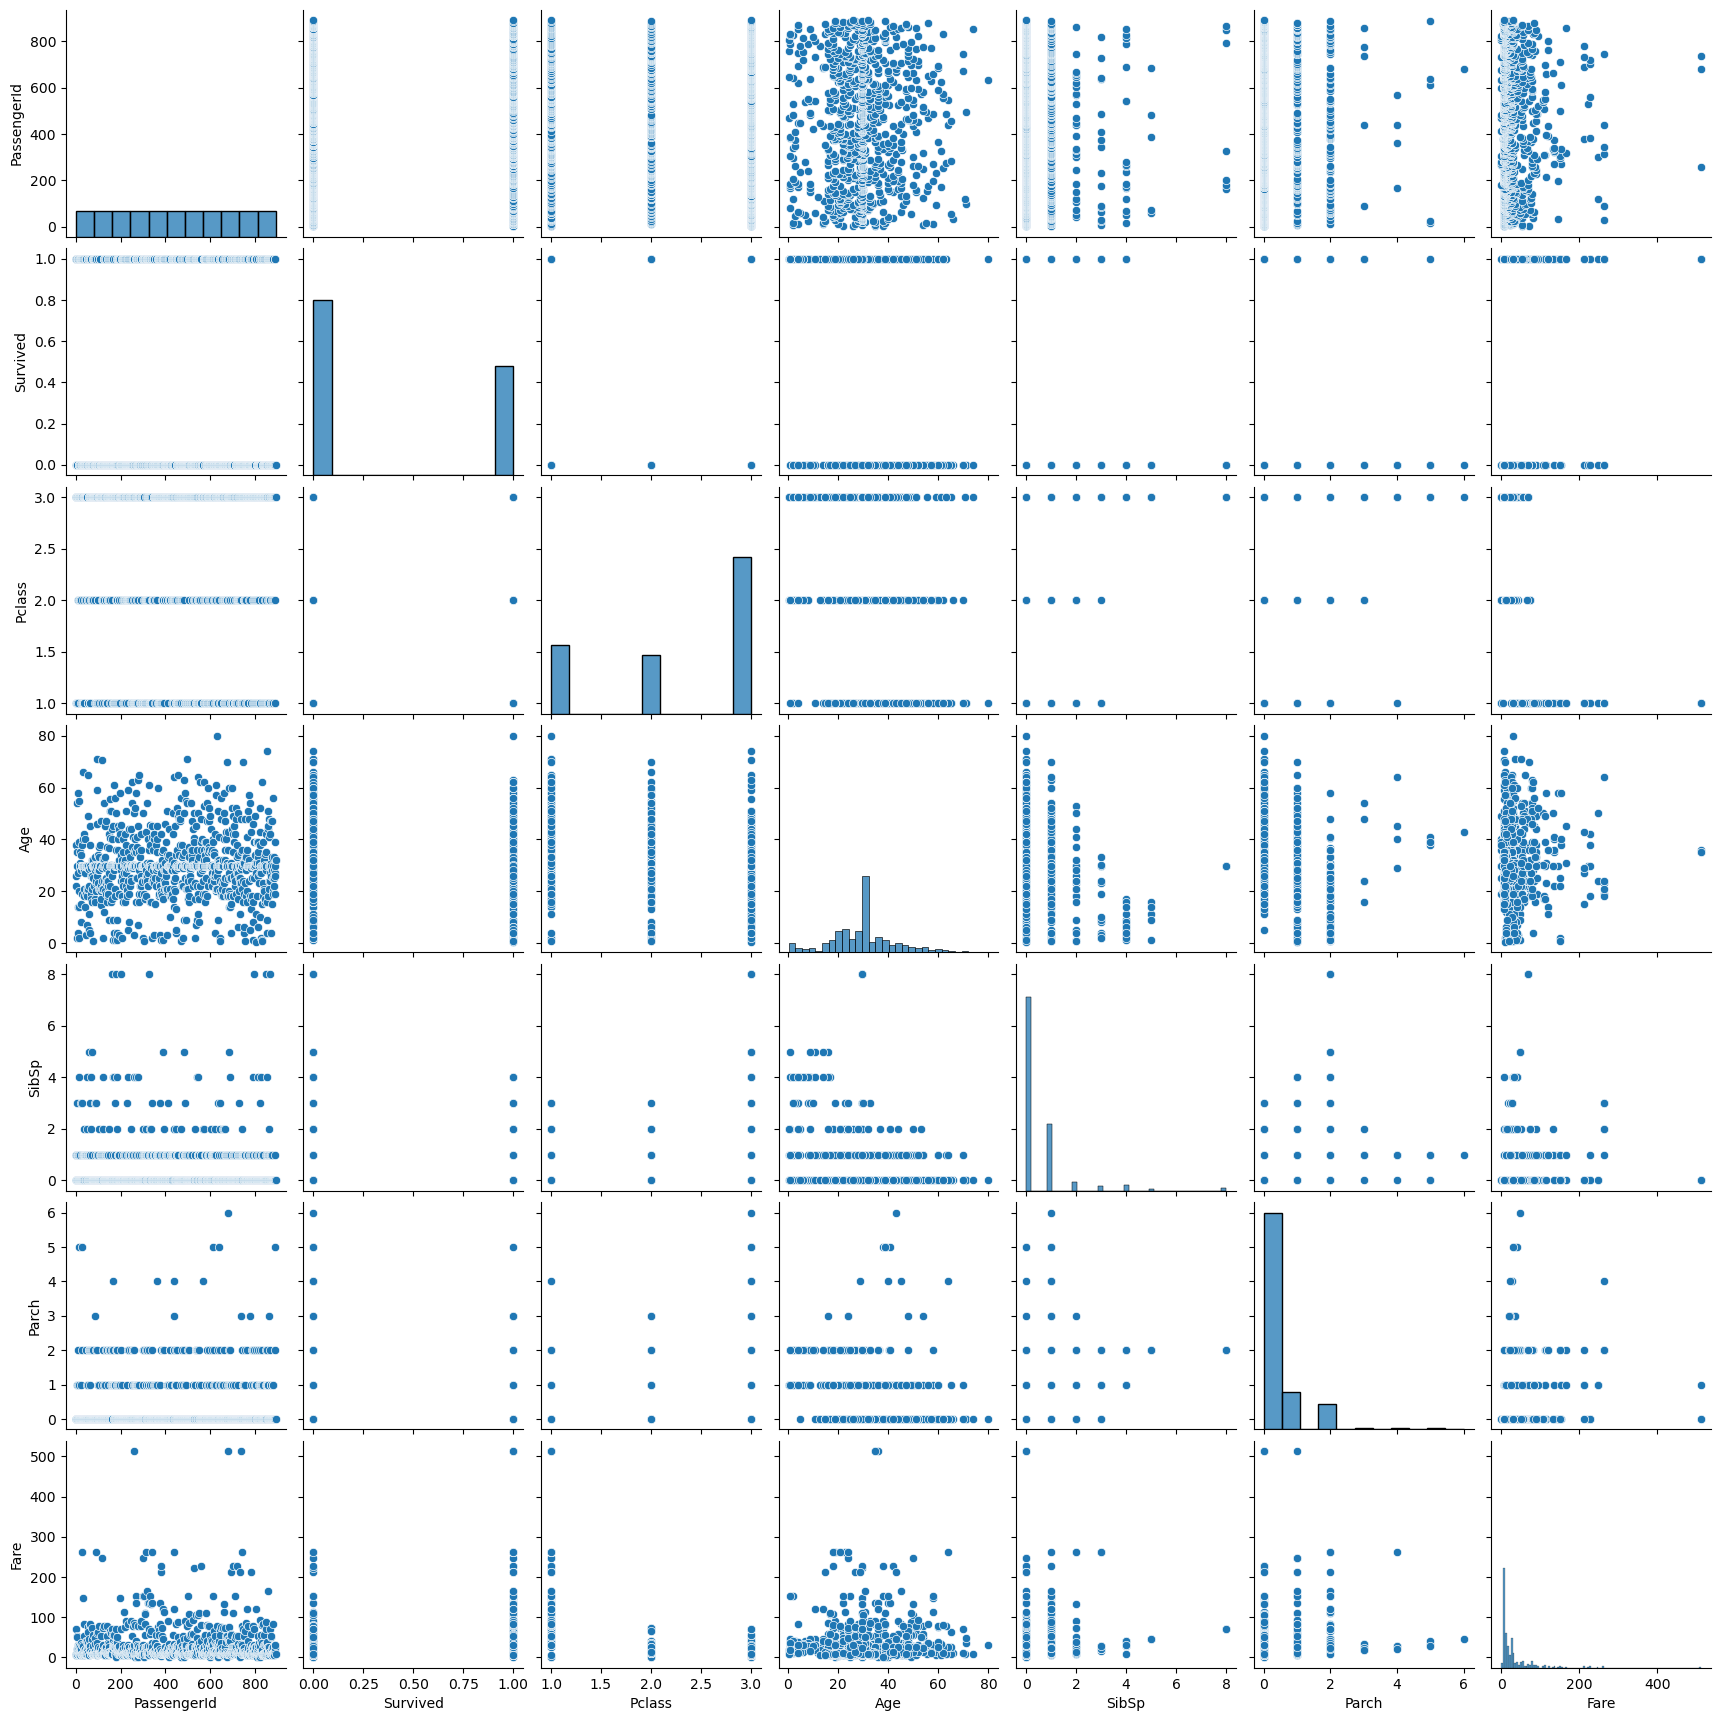

In [70]:
sns.pairplot(data)

<Axes: xlabel='Fare', ylabel='Pclass'>

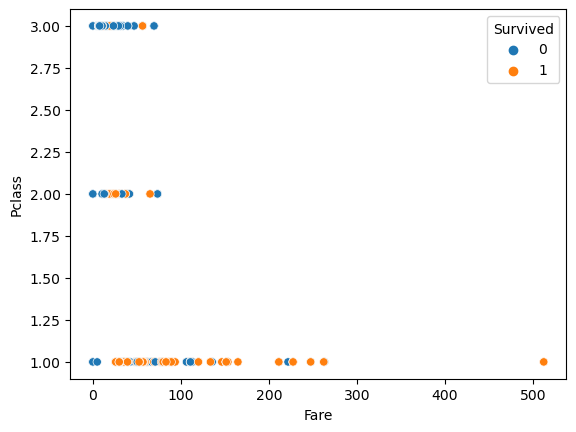

In [71]:
sns.scatterplot(x = 'Fare', y = 'Pclass', hue = 'Survived', data = data)

<Axes: xlabel='Survived', ylabel='Fare'>

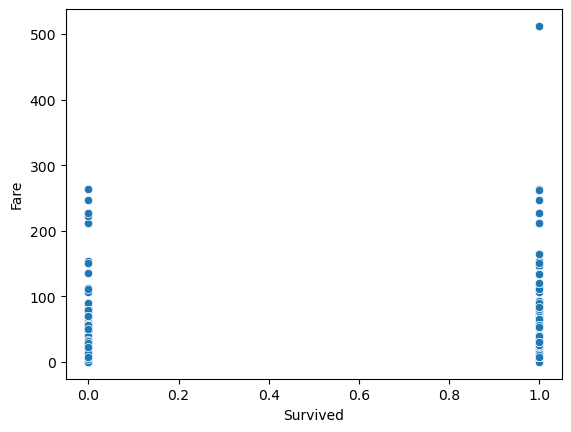

In [72]:
sns.scatterplot(x = 'Survived', y = 'Fare', data = data)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21684\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

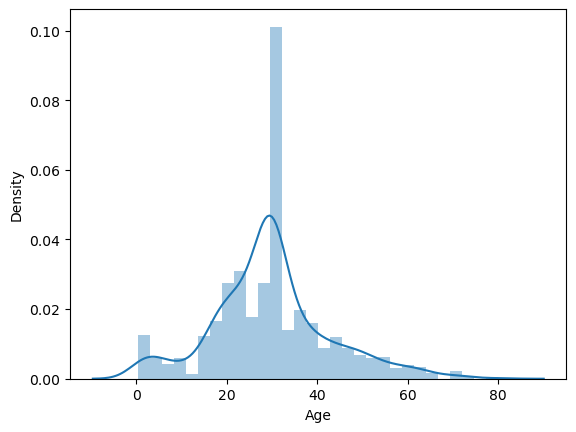

In [73]:
sns.distplot(data['Age'])

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


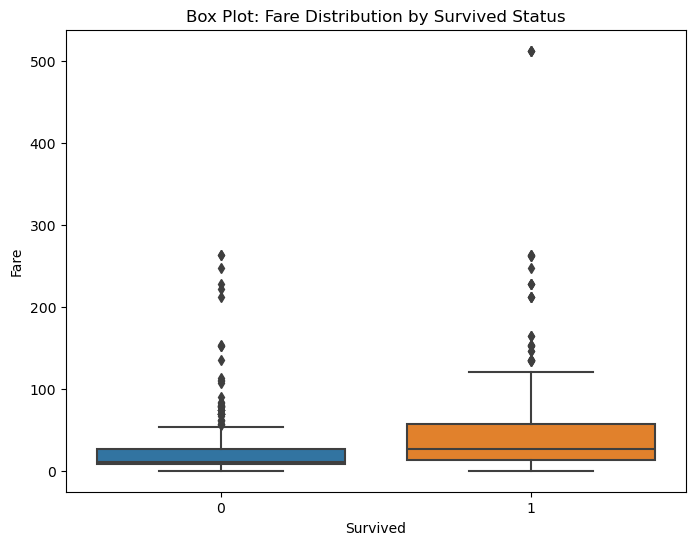

In [74]:
# Plot box plot between 'Survived' and 'Fare' using cleaned data
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=data_cleaned)
plt.title('Box Plot: Fare Distribution by Survived Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


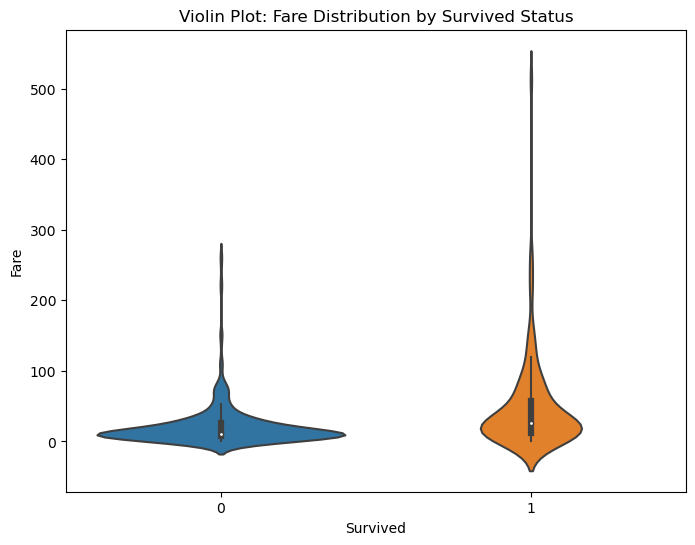

In [75]:
# Plot violin plot between 'Survived' and 'Fare' using cleaned data
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Fare', data=data_cleaned)
plt.title('Violin Plot: Fare Distribution by Survived Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21684\3820872734.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_summary = data_cleaned.groupby('Survived')['Fare'].mean()  # or .median()
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


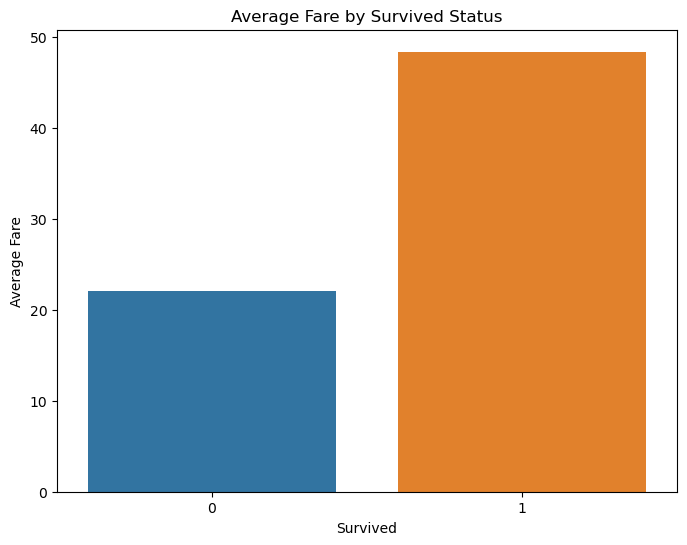

In [76]:
# Calculate mean or median Fare by Survived status
fare_summary = data_cleaned.groupby('Survived')['Fare'].mean()  # or .median()

# Plot bar plot for Fare by Survived status
plt.figure(figsize=(8, 6))
sns.barplot(x=fare_summary.index, y=fare_summary.values)
plt.title('Average Fare by Survived Status')
plt.xlabel('Survived')
plt.ylabel('Average Fare')
plt.show()

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


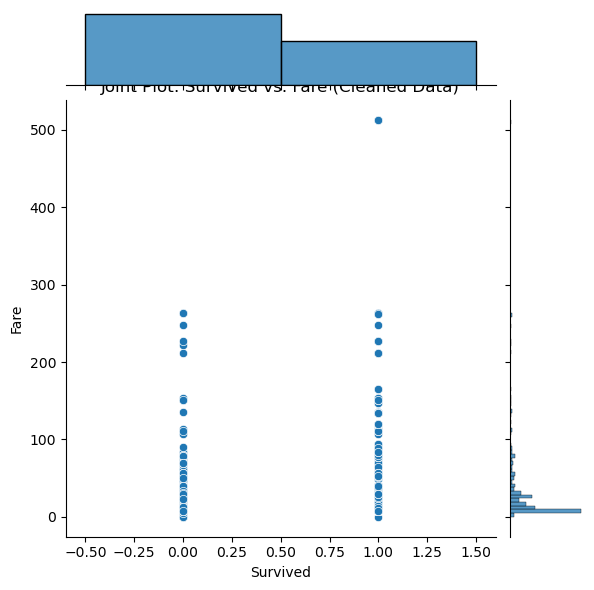

In [77]:
# Convert 'Survived' column to categorical for better visualization
data_cleaned['Survived'] = data_cleaned['Survived'].astype('category')

# Plot joint plot between 'Survived' and 'Fare' using cleaned data
sns.jointplot(x='Survived', y='Fare', kind='scatter', data=data_cleaned)
plt.title('Joint Plot: Survived vs. Fare (Cleaned Data)')
plt.show()

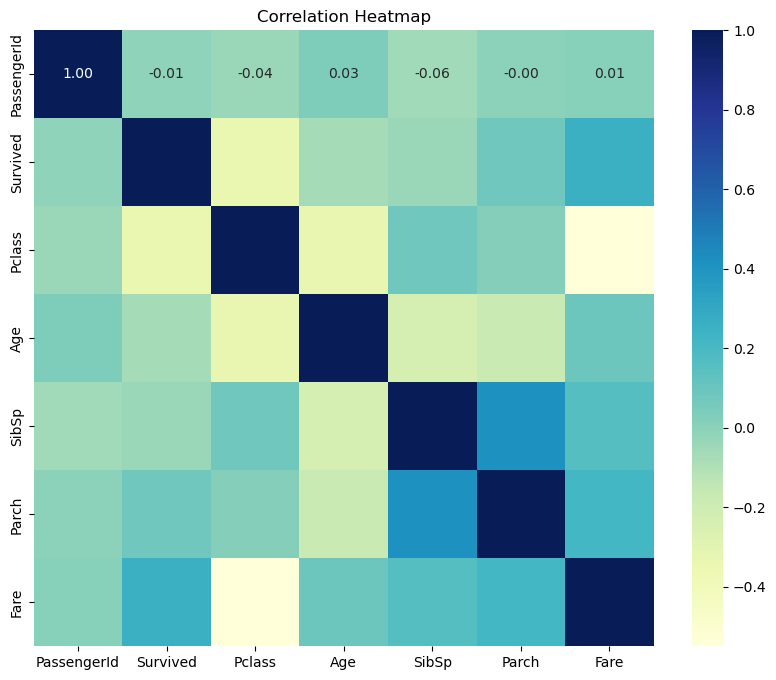

In [78]:
# Drop non-numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
numeric_data = data[numeric_columns]

# Compute correlation matrix
tc = numeric_data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(tc, annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Price of Ticket for each passenger is distributed**

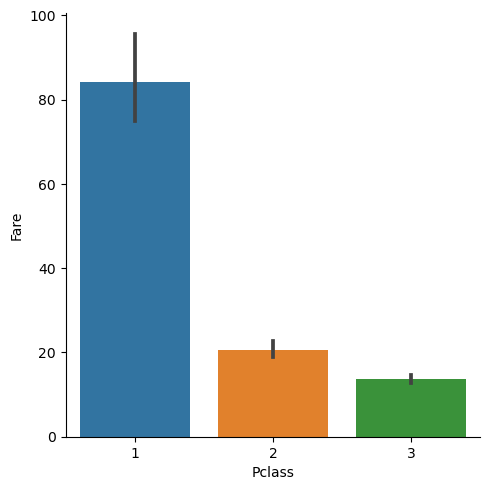

In [79]:
sns.catplot(x='Pclass', y='Fare', data=data, kind='bar')